# Welcome to nextnanopy !

## About this example: load polygons from a GDSII file

This example is aimed for users who are familiar with GDSII files.

Citing from [wikipedia](https://en.wikipedia.org/wiki/GDSII):

> GDSII stream format, common acronym GDSII, is a database file format which is the de facto industry standard for data exchange of integrated circuit or IC layout artwork. It is a binary file format representing planar geometric shapes, text labels, and other information about the layout in hierarchical form. The data can be used to reconstruct all or part of the artwork to be used in sharing layouts, transferring artwork between different tools, or creating photomasks. 

For example, for an experimentalist who designs and fabricates the sample in a clean room facility, it is common to work with GDSII files.

Here, the goal is to translate the polygons defined in a GDSII file to a shape which nextnano can understand.

The simplest example is that the GDSII file contains a simple square (in 2D) and you want to translate it into a cube (3D) in nextnano.

Especially for people who work with gated structures like 2DEG in GaAs heterostructures, the geometry of the gates are directly related to the physics behind. Moreover, these gated devices become more and more complicated in terms of the gate geometries.

If the user has to translate these geometries manually, it will take for ever without mentioning the potential human error. Therefore, we started to develop a feature which can load the polygons from a GDSII file and then, the user can easily generate a desired nextnano shape.

For the moment, this feature has only few functionalities and it is limited by nextnano++ shapes. However, the idea is to expand it in the future.

## Requirements

You need to install [matplotlib](https://matplotlib.org/), [gdspy](https://gdspy.readthedocs.io/en/stable/), [Shapely](https://shapely.readthedocs.io/en/stable/).

We recommend to use the anaconda prompt to install these packages:

```
conda install matplotlib
pip install gdspy
conda install Shapely
```


## How to load the polygons from a GDSII file?

There is class called ```GdsPolygons``` which will load the polygons in a GDSII file:

```python
from nextnanopy.nnp.shapes import GdsPolygons
my_gds = GdsPolygons(path_to_file, unit='nm')
```

This object contains all the relevant information:
- number of polygons: via ```my_gds.nb_polygons```
- x and y coordinates of the vertexes: ```my_gds.polygons_xy``` or ```my_gds.xy``` (transposed array)
- labels: user-defined labels for each polygons

It has also a easy method to plot the polygons:

```python
my_gds.show()
```

You can generate the raw text of the shape for an input file by some defined method. For example, to get a polygonal_prism shape of 20 nm in the z direction, you can do:

```python
my_gds.get_polygon_prism(zi=0, zf=20)
```

For the moment, it is only implemented the shapes:
- obelisk (3D)
- polygonal_prism (3D)

In [1]:
import nextnanopy as nn
from nextnanopy.nnp.shapes import GdsPolygons

my_gds = GdsPolygons(r'E:\junliang.wang\gds\example2.gds')

## Let's have a look of the polygons

Number of polygons: 2


<IPython.core.display.Javascript object>


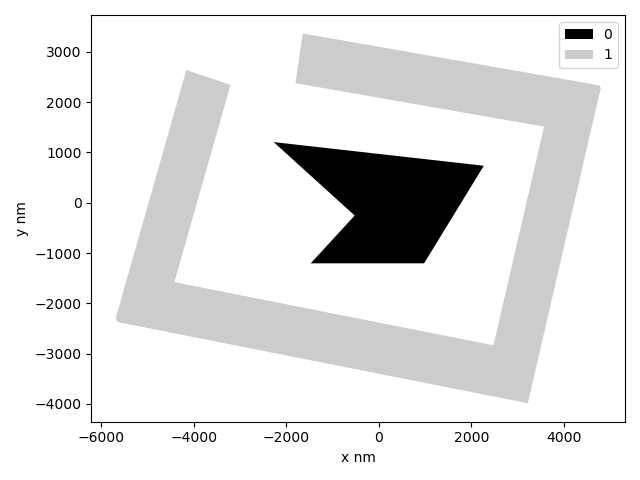

In [2]:
import matplotlib.pyplot as plt
%matplotlib notebook

print(f"Number of polygons: {my_gds.nb_polygons}")
my_gds.show()

## How to access to the vertexes coordinates

This information is stored in:

```python
x,y = my_gds.xy
```

For example, the x and y for the second vertex of the first polygon is ```x[0][1]``` and ```y[0][1]```.

<IPython.core.display.Javascript object>


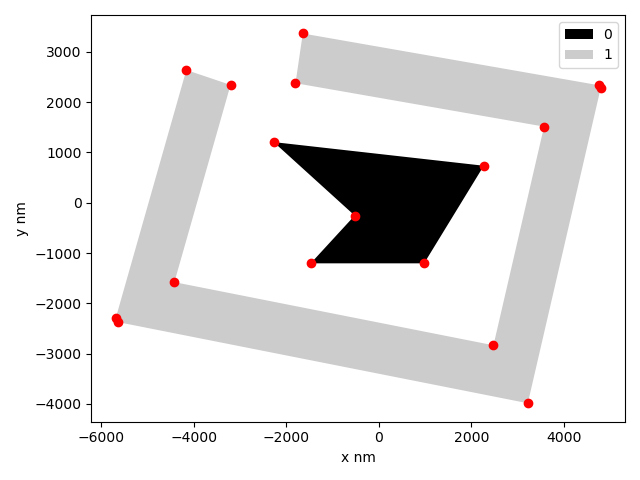

In [3]:
fig, ax = plt.subplots(1)
my_gds.show(ax=ax)

for xyi in my_gds.xy:
    xi, yi = xyi
    ax.plot(xi,yi,'ro')

## Set your own labels to the polygons

<IPython.core.display.Javascript object>


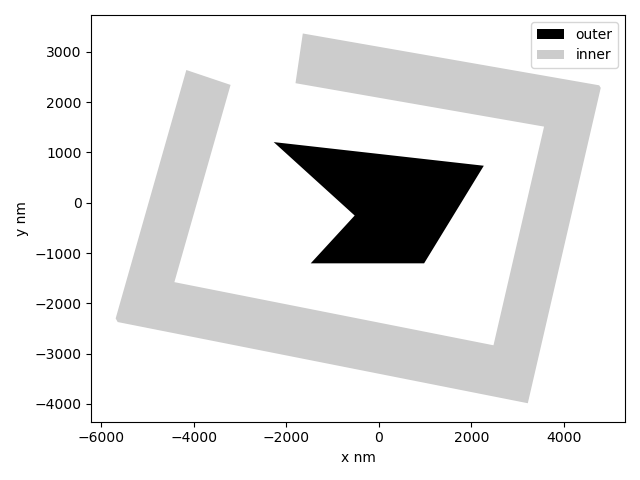

In [4]:
my_gds.labels = ['outer','inner']
my_gds.show()

## Get raw text of a polygonal_prism for the input file

The polygon from the GDSII file is a 2D geometry, but a polygonal_prism is a 3D object. So the user has to define the coordinates for the z direction via the arguments ```zi``` and ```zf``` in the method ```.get_polygonal_prism```

In [5]:
list_of_shapes = my_gds.get_polygonal_prisms(zi=0,zf=20) # initial and final z coordinates are needed for this method
for shape in list_of_shapes:
    print(shape.text)

polygonal_prism{ 
   z = [0, 20]
   vertex{ 
      x = [-1469.9999999999998]
      y = [-1205.0]
    }
   vertex{ 
      x = [-520.0]
      y = [-254.99999999999997]
    }
   vertex{ 
      x = [-2269.9999999999995]
      y = [1205.0]
    }
   vertex{ 
      x = [2269.9999999999995]
      y = [734.9999999999999]
    }
   vertex{ 
      x = [979.9999999999999]
      y = [-1205.0]
    }
 }
polygonal_prism{ 
   z = [0, 20]
   vertex{ 
      x = [3220.9999999999995]
      y = [-3985.9999999999995]
    }
   vertex{ 
      x = [-5640.999999999999]
      y = [-2371.9999999999995]
    }
   vertex{ 
      x = [-5685.0]
      y = [-2300.0]
    }
   vertex{ 
      x = [-4158.0]
      y = [2638.0]
    }
   vertex{ 
      x = [-3202.0]
      y = [2341.9999999999995]
    }
   vertex{ 
      x = [-4416.0]
      y = [-1578.9999999999998]
    }
   vertex{ 
      x = [2478.9999999999995]
      y = [-2833.9999999999995]
    }
   vertex{ 
      x = [3571.9999999999995]
      y = [1512.9999999999998]
    }

Please, contact python@nextnano.com for any issue with this example.